In [406]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA,
     QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [310]:
def create_confusion_matrix_df(cm):
    """
    Convert a confusion matrix to a pandas DataFrame and print it.
    
    Args:
        cm: Confusion matrix that needs to be converted to dataframe

    Returns:
        cm_df: A DataFrame version of the confusion matrix
    """
    # Convert matrix to pandas dataframe with labels
    cm_df = pd.DataFrame(cm, index=["No", "Yes"], columns=["No", "Yes"])

    return cm_df

In [202]:
Smarket =pd.read_csv('../datasets/Smarket.csv')
Smarket.set_index("Unnamed: 0", inplace=True)
Smarket


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Unnamed: 0,,,,,,,,,
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1246,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1247,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1248,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up


In [203]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [204]:
Smarket.select_dtypes(include=[np.number]).corr().to_numpy()

array([[ 1.        ,  0.02969965,  0.03059642,  0.03319458,  0.03568872,
         0.02978799,  0.53900647,  0.03009523],
       [ 0.02969965,  1.        , -0.02629433, -0.0108034 , -0.00298591,
        -0.00567461,  0.04090991, -0.02615505],
       [ 0.03059642, -0.02629433,  1.        , -0.02589667, -0.01085353,
        -0.00355795, -0.04338321, -0.01025003],
       [ 0.03319458, -0.0108034 , -0.02589667,  1.        , -0.02405104,
        -0.01880834, -0.04182369, -0.00244765],
       [ 0.03568872, -0.00298591, -0.01085353, -0.02405104,  1.        ,
        -0.02708364, -0.04841425, -0.00689953],
       [ 0.02978799, -0.00567461, -0.00355795, -0.01880834, -0.02708364,
         1.        , -0.02200231, -0.03486008],
       [ 0.53900647,  0.04090991, -0.04338321, -0.04182369, -0.04841425,
        -0.02200231,  1.        ,  0.01459182],
       [ 0.03009523, -0.02615505, -0.01025003, -0.00244765, -0.00689953,
        -0.03486008,  0.01459182,  1.        ]])

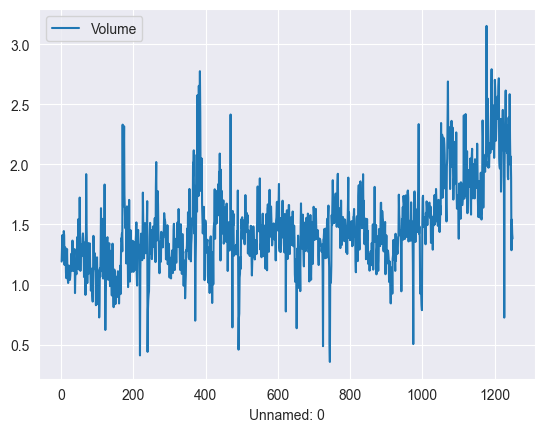

In [205]:
Smarket.plot(y='Volume');

In [206]:
allvars = Smarket.columns.drop(['Today','Direction','Year'])

X = Smarket[allvars]  # Get predictor data
y = np.where(Smarket.Direction == 'Up', 1, 0)  # Convert response

# Standardize the predictors to have mean=0 and variance=1
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Fit the logistic regression model
glm_binom = sm.GLM(y, X_std, family=sm.families.Binomial())
res = glm_binom.fit()

# Print the summary statistics
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1244
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -864.64
Date:                Thu, 08 Feb 2024   Deviance:                       1729.3
Time:                        15:59:37   Pearson chi2:                 1.25e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.001512
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0829      0.057     -1.455      0.1

In [207]:
res.params

array([-0.08286343, -0.04795568,  0.01265731,  0.01065394,  0.01184819,
        0.04865308])

In [208]:
res.pvalues

array([0.14562514, 0.39898618, 0.8237013 , 0.85137899, 0.83464992,
       0.39303549])

In [209]:
probs = res.predict()
probs[:10]

array([0.48865042, 0.46310658, 0.46278103, 0.4967882 , 0.49235809,
       0.48852084, 0.47426446, 0.49078573, 0.49919008, 0.4704632 ])

In [210]:
from sklearn.metrics import confusion_matrix

# Decide on a threshold
threshold = 0.5

labels = np.array(['Down']*1250)
labels[probs >0.5] = "Up"

# Predict class labels based on the threshold
predicted_labels = [1 if p > threshold else 0 for p in probs]
cm = confusion_matrix(y, predicted_labels)
# Print confusion matrix
cm_df = pd.DataFrame(cm.T,
                     index=["Predicted Down", "Predicted Up"],
                     columns=["Actual Down", "Actual Up"])
print(cm_df)

                Actual Down  Actual Up
Predicted Down          326        306
Predicted Up            276        342


In [211]:
(307+397)/1250

0.5632

In [212]:
print("Training error rate: %", (1- .5632)*100)

Training error rate: % 43.68


In [213]:
train = (Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[~train]
Smarket_test.shape
 

(252, 9)

In [214]:
train = train.reset_index(drop=True)
X_std = pd.DataFrame(X_std)
y = pd.Series(y)
X_train, X_test = X_std.loc[train], X_std.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]

glm_binom = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_binom.fit()

# Print the summary statistics
probs = results.predict(exog = X_test)

In [215]:
D = Smarket.Direction
D = np.where(D == 'Up', 1, 0)
L_train, L_test = D[train], D[~train]

In [216]:
labels = np.array(['Down']*252)
labels[probs > 0.5] = 'Up'
labels = np.where(labels == 'Up', 1, 0)

pd.crosstab(labels, L_test, rownames=['Predicted'], colnames=['Truth'])

Truth,0,1
Predicted,,
0,90,119
1,21,22


In [217]:
confusion_matrix(L_test, labels)

array([[ 90,  21],
       [119,  22]], dtype=int64)

In [218]:
print("test accuracy:",(90+22)/(90+119+22+21))
print("test error:", 1-(90 + 22) / (90 + 119 + 22 + 21))

test accuracy: 0.4444444444444444
test error: 0.5555555555555556


In [219]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# Extracting our predictors and response
X = Smarket[['Lag1', 'Lag2']]
y = np.where(Smarket["Direction"] == "Up", 1, 0)
train.index = Smarket.index
# Split the data into training and testing sets using your definition of train
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y[train], y[~train]

# Add the constant term to our train dataset - this is a requirement for the statsmodels API
X_train = sm.add_constant(X_train)

# Fit the logistic regression model
model = sm.GLM(y_train, X_train, family = sm.families.Binomial())
results = model.fit()

# Print the summary of the model
print(results.summary())

# Compute the predicted probabilities on the test set
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

# Convert probabilities into binary outcomes
y_pred_labels = np.where(y_pred >0.5, 1, 0)

# Compute the confusion matrix
confusion_matrix(y_test, y_pred_labels)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  998
Model:                            GLM   Df Residuals:                      995
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -690.70
Date:                Thu, 08 Feb 2024   Deviance:                       1381.4
Time:                        15:59:38   Pearson chi2:                     998.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.001865
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0322      0.063      0.508      0.6

array([[ 35,  76],
       [ 35, 106]], dtype=int64)

In [220]:
(35+106)/252,106/(106+76)

(0.5595238095238095, 0.5824175824175825)

In [221]:

# Now create new data for prediction
newdata = pd.DataFrame({'Lag1' : [1.2, 1.5], 'Lag2' : [1.1, -0.8]})

# Add constant to new data
newdata = sm.add_constant(newdata)

# Use the model to predict probabilities for new data
y_new_pred = results.predict(newdata)

# Print the predicted probabilities
print("Predicted probabilities for new data: \n", y_new_pred)

Predicted probabilities for new data: 
 0    0.479146
1    0.496094
dtype: float64


# LDA 

In [222]:
lda = LDA(store_covariance=True)

In [223]:

# Initiate LDA model
lda = LDA(store_covariance=True)


X_train, X_test = [M.drop(columns=['const'])
                   for M in [X_train, X_test]]
lda.fit(X_train, L_train)

# Fit the LDA model
lda.fit(X_train, L_train)


LinearDiscriminantAnalysis(store_covariance=True)

In [224]:
np.round(lda.means_,2)

array([[ 0.04,  0.03],
       [-0.04, -0.03]])

In [225]:
np.array(lda.classes_) # 0 is down, 1 is up 

array([0, 1])

In [226]:
np.round(lda.priors_,4) # πˆDown = 0.492 and πˆUp = 0.508

array([0.492, 0.508])

In [227]:
lda.scalings_ #The linear discriminant vectors can be found in the scalings_ attribute 

array([[-0.64201904],
       [-0.51352928]])

These values provide the linear combination of Lag1 and Lag2 that are used
to form the LDA decision rule. In other words, these are the multipliers of
the elements of X = x in (4.24). If −0.64 × Lag1 − 0.51 × Lag2 is large,
then the LDA classifer will predict a market increase, and if it is small,
then the LDA classifer will predict a market decline.

In [228]:
lda_pred = lda.predict(X_test)

In [245]:
cm = confusion_matrix(lda_pred, L_test)
# Modified code for adding labels

# Convert matrix to pandas dataframe with labels
cm_df = pd.DataFrame(cm, index=["Predicted Down", "Predicted Up"], columns=["Actual Down", "Actual Up"])

print(cm_df)

                Actual Down  Actual Up
Predicted Down           35         35
Predicted Up             76        106


We can also estimate the probability of each class for each point in a
training set. Applying a 50% threshold to the posterior probabilities of being in class one allows us to recreate the predictions contained in lda_pred.

In [232]:
lda_prob = lda.predict_proba(X_test)
np.all(
    np.where(lda_prob[:,1] >= 0.5, 1,0) == lda_pred
)

True

Above, we used the np.where() function that creates an array with value np.where() 'Up' for indices where the second column of lda_prob (the estimated posterior probability of 'Up') is greater than 0.5. For problems with more than
two classes the labels are chosen as the class whose posterior probability is
highest:

In [234]:
np.all(
    [lda.classes_[i] for i in np.argmax(lda_prob, 1)] ==
    lda_pred
)

True

If we wanted to use a posterior probability threshold other than 50% in
order to make predictions, then we could easily do so. For instance, suppose
that we wish to predict a market decrease only if we are very certain that the
market will indeed decrease on that day — say, if the posterior probability
is at least 90%. We know that the frst column of lda_prob corresponds to
the label Down after having checked the classes_ attribute, hence we use
the column index 0 rather than 1 as we did above

In [236]:
np.sum(lda_prob[:,0] > 0.9)

0

# 4.7.4 Quadratic Discriminant Analysis


In [237]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [239]:
qda.means_, qda.priors_

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([0.49198397, 0.50801603]))

The QDA() classifer will estimate one covariance per class. Here is the
estimated covariance in the frst class:

In [240]:
qda.covariance_[0]

array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]])

In [246]:
# Create confusion matrix
cm = confusion_matrix(qda_pred, L_test)

# Modified code for adding labels

# Convert matrix to pandas dataframe with labels
cm_df = pd.DataFrame(cm, index=["Predicted Down", "Predicted Up"], columns=["Actual Down", "Actual Up"])

print(cm_df)

                Actual Down  Actual Up
Predicted Down           30         20
Predicted Up             81        121


In [248]:
np.mean(qda_pred == L_test)

0.5992063492063492

# 4.7.5 Naive Bayes

In [249]:
NB = GaussianNB()
NB.fit(X_train, L_train)

GaussianNB()

In [250]:
NB.classes_

array([0, 1])

In [255]:
np.round(NB.class_prior_, 2)

array([0.49, 0.51])

The parameters of the features can be found in the theta_ and var_
attributes. The number of rows is equal to the number of classes, while the
number of columns is equal to the number of features. We see below that
the mean for feature Lag1 in the Down class is 0.043.

In [257]:
np.round(NB.theta_, 3)

array([[ 0.043,  0.034],
       [-0.04 , -0.031]])

In [258]:
NB.var_

array([[1.50355429, 1.53246749],
       [1.51401364, 1.48732877]])

In [263]:
X_train[L_train == 0].mean()

Lag1    0.042790
Lag2    0.033894
dtype: float64

In [265]:
X_train[L_train == 0].var(ddof=0)

Lag1    1.503554
Lag2    1.532467
dtype: float64

In [266]:
nb_labels = NB.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(nb_labels, L_test)

# Modified code for adding labels

# Convert matrix to pandas dataframe with labels
cm_df = pd.DataFrame(cm, index=["Predicted Down", "Predicted Up"], columns=["Actual Down", "Actual Up"])

print(cm_df)

                Actual Down  Actual Up
Predicted Down           29         20
Predicted Up             82        121


In [268]:
NB.predict_proba(X_test)[:5]

array([[0.4873288 , 0.5126712 ],
       [0.47623584, 0.52376416],
       [0.46529531, 0.53470469],
       [0.47484469, 0.52515531],
       [0.49020587, 0.50979413]])

# 4.7.6 K-Nearest Neighbors

In [270]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
cm = confusion_matrix(knn1_pred, L_test)
create_confusion_matrix_df(cm)

                Actual Down  Actual Up
Predicted Down           43         58
Predicted Up             68         83


,Actual Down,Actual Up
Predicted Down,43,58
Predicted Up,68,83


In [271]:
(83+43)/252, np.mean(knn1_pred == L_test)

(0.5, 0.5)

Using K = 3

In [273]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_pred = knn3.fit(X_train, L_train).predict(X_test)
np.round(np.mean(knn3_pred == L_test), 3)

0.532

KNN does not perform well on the Smarket data, but it often does provide
impressive results. As an example we will apply the KNN approach to the
Caravan data set, which is part of the ISLP library. This data set includes 85
predictors that measure demographic characteristics for 5,822 individuals.
The response variable is Purchase, which indicates whether or not a given
individual purchases a caravan insurance policy. In this data set, only 6%
of people purchased caravan insurance.

In [287]:
Caravan = pd.read_csv('../datasets/Caravan.csv')
Caravan.set_index("Unnamed: 0", inplace=True)
Purchase = Caravan.Purchase
Purchase.value_counts()

Purchase
No     5474
Yes     348
Name: count, dtype: int64

In [292]:
Caravan

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,No
5819,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
5820,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,Yes


In [293]:
348/5822

0.05977327378907592

In [294]:
feature_df = Caravan.drop(columns=['Purchase'])

standardize the data so that all standardize variables are given a mean of zero and a standard deviation of one. Then
all variables will be on a comparable scale. This is accomplished using the
StandardScaler() transformation.

In [295]:
scaler = StandardScaler(with_mean=True,
    with_std=True,
    copy=True)

In [296]:
scaler.fit(feature_df)
X_std = scaler.transform(feature_df)

In [297]:
feature_std = pd.DataFrame(
    X_std,
    columns=feature_df.columns);
feature_std.std()

MOSTYPE     1.000086
MAANTHUI    1.000086
MGEMOMV     1.000086
MGEMLEEF    1.000086
MOSHOOFD    1.000086
              ...   
AZEILPL     1.000086
APLEZIER    1.000086
AFIETS      1.000086
AINBOED     1.000086
ABYSTAND    1.000086
Length: 85, dtype: float64

In [298]:
 (X_train,
  X_test,
  y_train,
  y_test) = train_test_split(feature_std, 
                             Purchase, # predicting purchases
                             test_size=1000,
                             random_state=0)

In [299]:
knn1 = KNeighborsClassifier(n_neighbors=1) #declaring our model 
knn1_pred = knn1.fit(X_train, y_train).predict(X_test) #fitting our model to train data
np.mean(y_test != knn1_pred), np.mean(y_test != "No") # testing model against test data

(0.111, 0.067)

In [301]:
cm = confusion_matrix(knn1_pred, y_test)

# Convert matrix to pandas dataframe with labels
create_confusion_matrix_df(cm)

                Actual Down  Actual Up
Predicted Down          880         58
Predicted Up             53          9


,Actual Down,Actual Up
Predicted Down,880,58
Predicted Up,53,9


Among 62 such
customers, 9, or 14.5%, actually do purchase insurance. This is double the
rate that one would obtain from random guessing.

In [305]:
np.round(9/(53+9),3)

0.145

In [312]:
for K in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    C = create_confusion_matrix_df(confusion_matrix(knn_pred, y_test))
    templ = ('K={0:d}: # predicted to rent: {1:>2},' +
             ' # who did rent {2:d}, accuracy {3:.1%}')
    pred = C.loc['Yes'].sum()
    did_rent = C.loc['Yes','Yes']
    print(templ.format(
        K,
        pred,
        did_rent,
        did_rent / pred))

K=1: # predicted to rent: 62, # who did rent 9, accuracy 14.5%
K=2: # predicted to rent:  6, # who did rent 1, accuracy 16.7%
K=3: # predicted to rent: 20, # who did rent 3, accuracy 15.0%
K=4: # predicted to rent:  4, # who did rent 0, accuracy 0.0%
K=5: # predicted to rent:  7, # who did rent 1, accuracy 14.3%


Comparison to Logistic Regression

In [314]:
logit = LogisticRegression(C=1e10, solver='liblinear')
logit.fit(X_train, y_train)
logit_pred = logit.predict_proba(X_test)
logit_labels = np.where(logit_pred[:,1] > 5, 'Yes', 'No')
create_confusion_matrix_df(confusion_matrix(logit_labels, y_test))

,No,Yes
No,933,67
Yes,0,0


We used the argument solver='liblinear' above to avoid a warning with
the default solver which would indicate that the algorithm does not converge.
If we use 0.5 as the predicted probability cut-of for the classifer, then
we have a problem: none of the test observations are predicted to purchase
insurance. However, we are not required to use a cut-of of 0.5. If we instead
predict a purchase any time the predicted probability of purchase exceeds
0.25, we get much better results: we predict that 29 people will purchase
insurance, and we are correct for about 31% of these people. This is almost
fve times better than random guessing

In [317]:
logit_labels = np.where(logit_pred[:,1]>0.25, 'Yes', 'No')
create_confusion_matrix_df(confusion_matrix(logit_labels, y_test))

,No,Yes
No,913,58
Yes,20,9


In [321]:
np.round(9/(20+9),3)

0.31

# 4.7.7 Linear and Poisson Regression on the Bikeshare Data

In [333]:
Bike = pd.read_csv('../datasets/Bikeshare.csv')
Bike

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
0,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,1,Dec,365,19,0,6,0,clear,0.42,0.4242,0.54,0.2239,19,73,92
8641,1,Dec,365,20,0,6,0,clear,0.42,0.4242,0.54,0.2239,8,63,71
8642,1,Dec,365,21,0,6,0,clear,0.40,0.4091,0.58,0.1940,2,50,52
8643,1,Dec,365,22,0,6,0,clear,0.38,0.3939,0.62,0.1343,2,36,38


In [383]:
Bike.shape, Bike.columns

((8645, 15),
 Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
        'registered', 'bikers'],
       dtype='object'))

In [398]:

# Fit the model
model = smf.ols('bikers ~ mnth + hr + workingday + temp + weathersit', data = Bike).fit()

# Print the summary results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 bikers   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     291.1
Date:                Thu, 08 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:07:25   Log-Likelihood:                -52635.
No. Observations:                8645   AIC:                         1.053e+05
Df Residuals:                    8627   BIC:                         1.054e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [399]:
np.sqrt(((model.fittedvalues - Bike.bikers)**2).sum()/len(Bike.bikers))

106.65534360848791

In [396]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

# Create DataFrames from your encoded information, one for month and one for hours.
mnth_encoded_df = pd.DataFrame(mnth_encoded, columns=[f"mnth_{i}" for i in range(mnth_encoded.shape[1])])
hr_encoded_df = pd.DataFrame(hr_encoded, columns=[f"hr_{i}" for i in range(hr_encoded.shape[1])])

# Combine all features into one DataFrame.
features_df = pd.concat([mnth_encoded_df, hr_encoded_df, Bike[['workingday', 'temp', 'weathersit', 'bikers']]], axis=1)

# Get the list of all columns in features_df
col_names = features_df.columns

# Create the formula for statsmodels
predictors = ' + '.join(col_names.difference(['bikers']))  # All column names except 'bikers'
formula = f'bikers ~ {predictors}'

# Create the model
model_2 = smf.ols(formula, data=features_df)
results = model_2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 bikers   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     457.3
Date:                Thu, 08 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:07:03   Log-Likelihood:                -49743.
No. Observations:                8645   AIC:                         9.957e+04
Df Residuals:                    8605   BIC:                         9.985e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [397]:
rmse = np.sqrt(((results.fittedvalues - Bike.bikers)**2).sum() / len(Bike.bikers))
print(f"The root mean squared error of the model is {rmse}")

The root mean squared error of the model is 76.32690321277276


In [402]:
np.allclose(model.fittedvalues , results.fittedvalues)

False

Poisson Regression

In [403]:
glm_bikeshare = smf.glm('bikers ~ mnth + hr + workingday + temp + weathersit', data = Bike, family=sm.families.Poisson()).fit()

In [404]:
glm_bikeshare.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 bikers   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8627
Model Family:                 Poisson   Df Model:                           17
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.4404e+05
Date:                Thu, 08 Feb 2024   Deviance:                   6.3504e+05
Time:                        21:13:14   Pearson chi2:                 6.83e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         3.0118      0.006    476.777      0.000       2.999       3.024
mnth[T.Aug]                      -0.2288      0.005    -48.719      0.000      -0.238      -0.220
mnth[T.Dec]                       0.2981      0.005     59.511      0.000       0.288       0.308
mnth[T.Feb]                      -0.1015      0.006    -17.160      0.000      -0.113      -0.090
mnth[T.Jan]                      -0.1450      0.007    -21.388      0.000      -0.158      -0.132
mnth[T.July]                     -0.3777      0.005    -76.183      0.000      -0.387      -0.368
mnth[T.June]                     -0.1502      0.005    -32.493      0.000      -0.159      -0.141
mnth[T.March]                    -0.0312      0.005     -5.833      0.000      -0.042      -0.021
mnth[T.May]                       0.0508      0.004     11.690      0.000       0.042       0.059
mnth[T.Nov]                       0.2845      0.005     61.782      0.000       0.276       0.294
mnth[T.Oct]                       0.2667      0.004     61.683      0.000       0.258       0.275
mnth[T.Sept]                     -0.0065      0.004     -1.473      0.141      -0.015       0.002
workingday[T.1]                  -0.0128      0.002     -6.573      0.000      -0.017      -0.009
weathersit[T.cloudy/misty]       -0.0308      0.002    -14.233      0.000      -0.035      -0.027
weathersit[T.heavy rain/snow]    -0.6455      0.167     -3.871      0.000      -0.972      -0.319
weathersit[T.light rain/snow]    -0.4728      0.004   -116.934      0.000      -0.481      -0.465
hr                                0.0507      0.000    351.836      0.000       0.050       0.051
temp                              2.5639      0.010    257.622      0.000       2.544       2.583
=================================================================================================
"""

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Peyton Molino\AppData\Local\Temp\ipykernel_14472\1990653061.py:4: SyntaxWarning: invalid escape sequence '\d'
  coef_mnth.index = coef_mnth.index.str.extract('(\d+)').squeeze().astype(int)
C:\Users\Peyton Molino\AppData\Local\Temp\ipykernel_14472\1990653061.py:5: SyntaxWarning: invalid escape sequence '\d'
  coef_hr.index = coef_hr.index.str.extract('(\d+)').squeeze().astype(int)


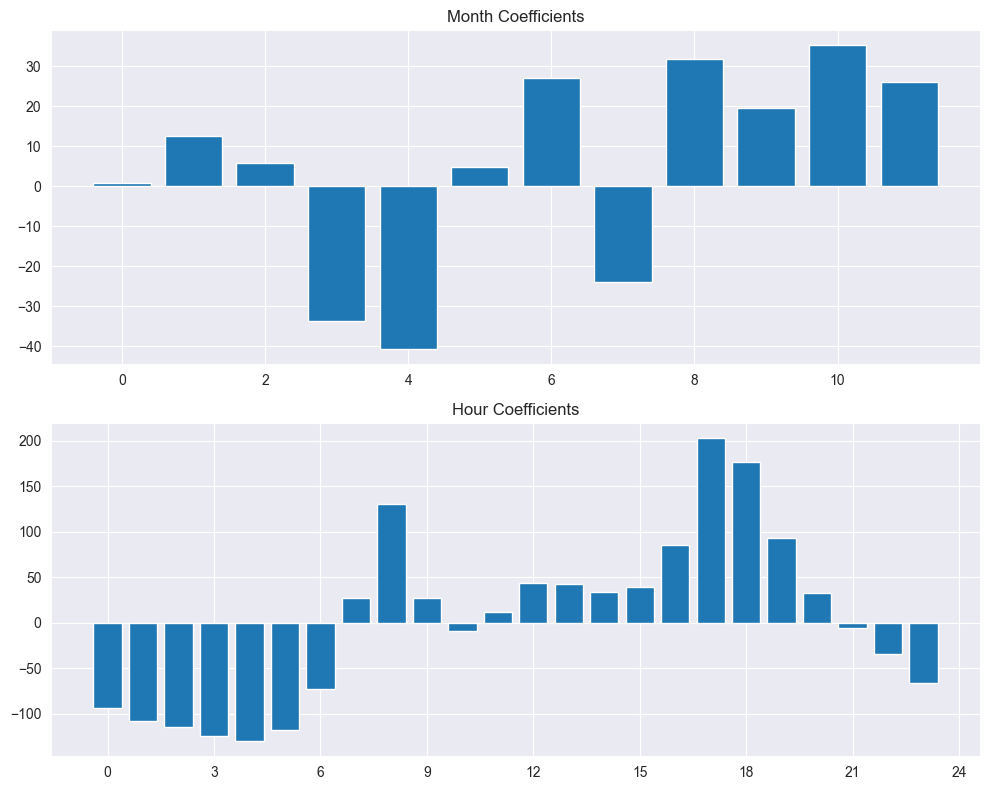

In [410]:

import matplotlib.ticker as ticker

# Extract month and hour number as integer from index
coef_mnth.index = coef_mnth.index.str.extract('(\d+)').squeeze().astype(int)
coef_hr.index = coef_hr.index.str.extract('(\d+)').squeeze().astype(int)

# Sort by index
coef_mnth = coef_mnth.sort_index()
coef_hr = coef_hr.sort_index()

# Create plot
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot month coefficients
axs[0].bar(coef_mnth.index, coef_mnth)
axs[0].set_title('Month Coefficients')
axs[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Ensure x ticks are displayed as integers

# Plot hour coefficients
axs[1].bar(coef_hr.index, coef_hr)
axs[1].set_title('Hour Coefficients')
axs[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Ensure x ticks are displayed as integers

plt.tight_layout()
plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Peyton Molino\AppData\Local\Temp\ipykernel_14472\2593838468.py:12: SyntaxWarning: invalid escape sequence '\d'
  coef_mnth.index = coef_mnth.index.str.extract('(\d+)').squeeze().fillna(-1).astype(int)
C:\Users\Peyton Molino\AppData\Local\Temp\ipykernel_14472\2593838468.py:13: SyntaxWarning: invalid escape sequence '\d'
  coef_hr.index = coef_hr.index.str.extract('(\d+)').squeeze().fillna(-1).astype(int)
C:\Users\Peyton Molino\AppData\Local\Temp\ipykernel_14472\2593838468.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  coef_mnth.index = coef_mnth.index.str.

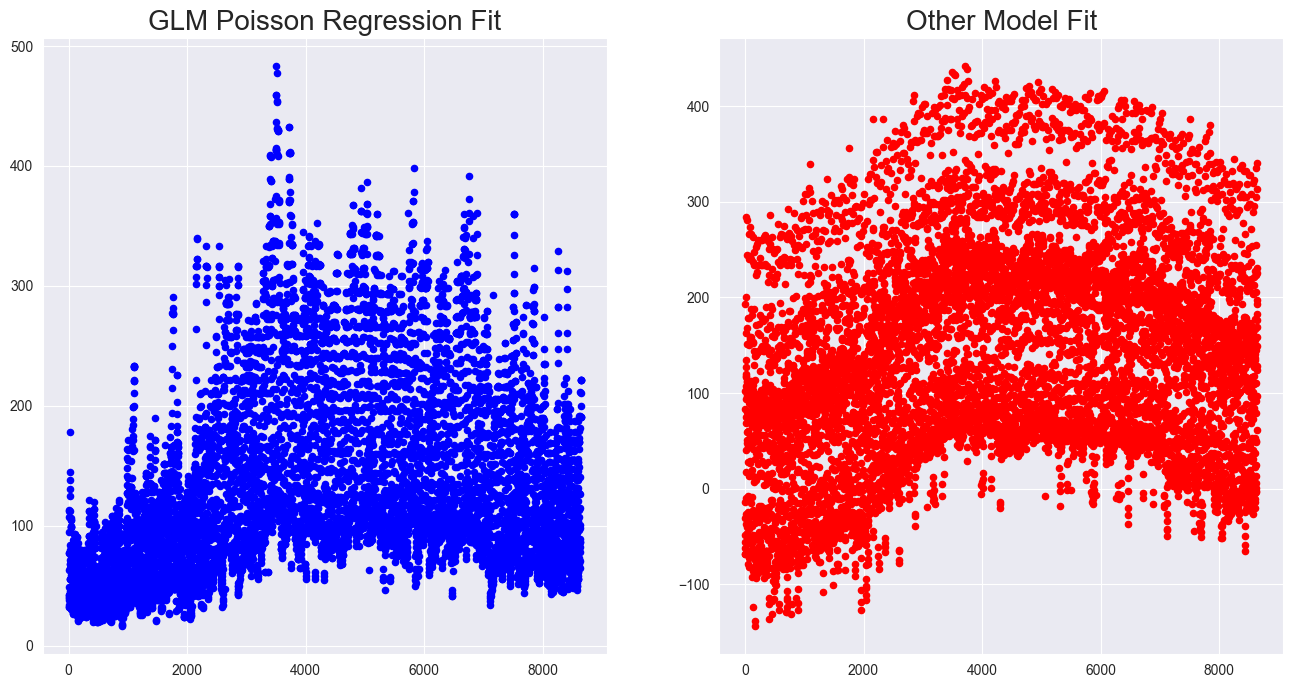

In [418]:

coef_mnth = pd.concat([glm_bikeshare.params[glm_bikeshare.params.index.str.contains('mnth')],
                      pd.Series([-glm_bikeshare.params[glm_bikeshare.params.index.str.contains('mnth')].sum()],
                                index=['mnth[Dec]'])])

coef_hr = pd.concat([glm_bikeshare.params[glm_bikeshare.params.index.str.contains('hr')],
                     pd.Series([-glm_bikeshare.params[glm_bikeshare.params.index.str.contains('hr')].sum()],
                               index=['hr[23]'])])

# As before, we extract the month and hour number as integer from indices, sort by index, and create the plot

# Extract month and hour number as integer from index
coef_mnth.index = coef_mnth.index.str.extract('(\d+)').squeeze().fillna(-1).astype(int)
coef_hr.index = coef_hr.index.str.extract('(\d+)').squeeze().fillna(-1).astype(int)

# Sort by index
coef_mnth = coef_mnth.sort_index()
coef_hr = coef_hr.sort_index()
fig, axs = plt.subplots(1, 2, figsize = (16, 8))

axs[0].scatter(range(len(glm_bikeshare.fittedvalues)), glm_bikeshare.fittedvalues, color = 'blue', s = 20)
axs[0].set_title('GLM Poisson Regression Fit', fontsize=20)

axs[1].scatter(range(len(results.fittedvalues)), results.fittedvalues, color = 'red', s = 20)
axs[1].set_title('Other Model Fit', fontsize=20)

plt.show()

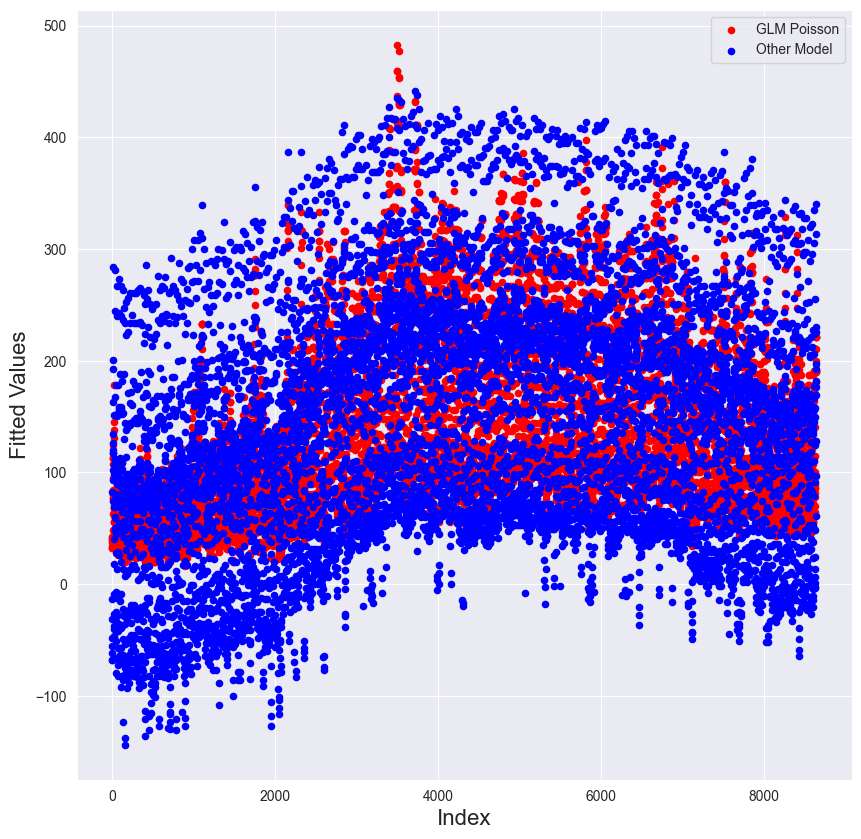

In [419]:
plt.figure(figsize=(10, 10))
# Scatter plot for GLM Poisson Regression Model with red color
plt.scatter(range(len(glm_bikeshare.fittedvalues)), glm_bikeshare.fittedvalues, color='red', s=20, label='GLM Poisson')
# Scatter plot for other model with blue color
plt.scatter(range(len(results.fittedvalues)), results.fittedvalues, color='blue', s=20, label='Other Model')
plt.xlabel('Index', fontsize=16)
plt.ylabel('Fitted Values', fontsize=16)
plt.legend(loc='best')  # Add a legend
plt.show()